OpenPifPaf version 0.13.11
PyTorch version 1.13.1+cpu


In [55]:
import numpy as np
import PIL
import matplotlib.pyplot as plt
import torch
import openpifpaf
import cv2
import os
import pandas as pd
#import ultralytics
from ultralytics import YOLO

#ultralytics.checks()

In [56]:
print('OpenPifPaf version', openpifpaf.__version__)
print('PyTorch version', torch.__version__)

OpenPifPaf version 0.13.11
PyTorch version 1.13.1+cpu


In [13]:
ds_path = "C:\Austin\Masters_UCinci\Thesis\Dataset\Characters"

In [ ]:
def load_dataset(folder):
    images = []
    for filename in os.listdir(folder):
        img = PIL.Image.open(os.path.join(folder,filename)).convert('RGB')
        if img is not None:
            images.append(img)
    return images

In [50]:
images = []
ds = {"content_source":[],"character":[],"art_type":[],"image_filename":[],"image":[]}


for source in os.listdir(ds_path):
    #print(source)
    source_path = os.path.join(ds_path,source)
    
    for character in os.listdir(source_path):
        #print(character)
        character_path = os.path.join(source_path,character)
        
        for art_type in os.listdir(character_path):
            #print(art_type)
            art_path = os.path.join(character_path,art_type)
            
            for image_filename in os.listdir(art_path):
                #print(image_filename)
                img = PIL.Image.open(os.path.join(art_path,image_filename)).convert('RGB')
                ds["content_source"].append(source)
                ds["character"].append(character)
                ds["art_type"].append(art_type)
                ds["image_filename"].append(image_filename)
                ds["image"].append(np.array(img))
                

Pokemon
Volo
Concept_Art
e37f298872d803a198e0e805633bdf08.jpg
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [210 217 210]
  [203 210 203]
  [195 202 195]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [210 217 210]
  [203 210 203]
  [195 202 195]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [210 217 210]
  [203 210 203]
  [195 202 195]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [213 219 217]
  [211 217 215]
  [210 216 214]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [212 218 216]
  [211 217 215]
  [210 216 214]]

 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [211 217 215]
  [210 216 214]
  [210 216 214]]]


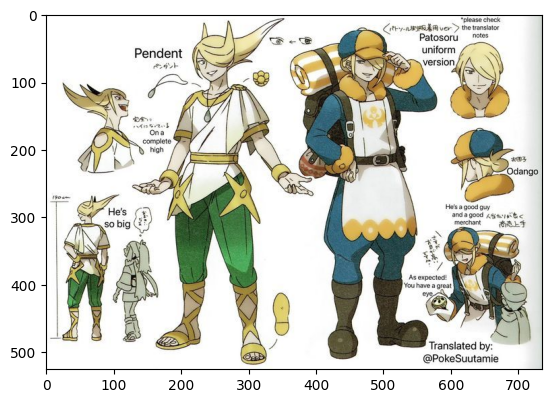

In [51]:
n=212
print(ds["content_source"][n])
print(ds["character"][n])
print(ds["art_type"][n])
print(ds["image_filename"][n])
print(ds["image"][n])
plt.imshow(ds["image"][n])

In [43]:
print(len(ds["content_source"]))
print(len(ds["character"]))
print(len(ds["art_type"]))
print(len(ds["image_filename"]))
print(len(ds["image"]))

213
213
213
213
213


In [52]:
ds = pd.DataFrame(ds)
ds.head()

,content_source,character,art_type,image_filename,image
0,Onepiece,Luffy,Concept_Art,0314536300c95193276277e2606f32f9.jpg,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
1,Onepiece,Luffy,Concept_Art,0497d2cdc288dd899ade6a6581293fe9.jpg,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
2,Onepiece,Luffy,Concept_Art,0791fbac86852df6e96d402b69036fb4.jpg,"[[[245, 240, 221], [245, 240, 221], [245, 240,..."
3,Onepiece,Luffy,Concept_Art,0f26156a368889e2f48a6d97068ae029.jpg,"[[[157, 166, 165], [176, 185, 184], [230, 239,..."
4,Onepiece,Luffy,Concept_Art,13490a102a3456b92ee290383fada416.jpg,"[[[250, 248, 251], [250, 248, 251], [250, 248,..."


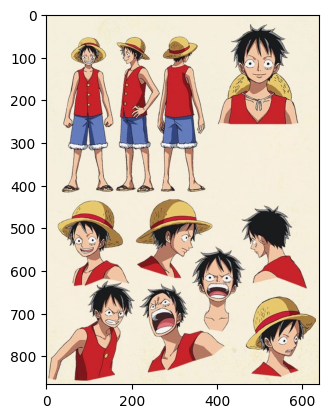

In [162]:
n = 2
plt.imshow(ds['image'][n])

In [163]:
model = YOLO('yolo11n.pt')  # load a pretrained YOLO detection model
#model.train(data='coco8.yaml', epochs=3)  # train the model
obj_detec = model(ds['image'][n])  # predict on an image


0: 640x480 6 persons, 1 kite, 299.7ms
Speed: 18.3ms preprocess, 299.7ms inference, 15.9ms postprocess per image at shape (1, 3, 640, 480)


In [169]:
test_bounds = obj_detec[0].to_df()["box"][2]
for x in test_bounds:
    test_bounds[x] = int(np.round(test_bounds[x]))
    
test_bounds

{'x1': 35, 'y1': 54, 'x2': 159, 'y2': 416}

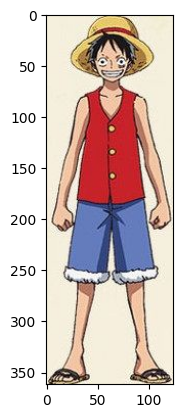

In [170]:
test_image = ds['image'][n][test_bounds["y1"]:test_bounds["y2"], test_bounds["x1"]:test_bounds["x2"]]
plt.imshow(test_image)

In [206]:
im_to_save = PIL.Image.fromarray(test_image)
im_to_save.save("test_image.jpg")

In [171]:
for i, r in enumerate(obj_detec):
    # Plot results image
    im_bgr = r.plot()  # BGR-order numpy array
    im_rgb = PIL.Image.fromarray(im_bgr).convert('RGB')  # RGB-order PIL image

    # Show results to screen (in supported environments)
    im_rgb.show()

In [172]:
predictor = openpifpaf.Predictor(checkpoint='shufflenetv2k16')

all_pose_preds = []

for img in [test_image]:
    predictions, gt_anns, image_meta = predictor.numpy_image(img)
    all_pose_preds.append(predictions)

In [173]:
len(all_pose_preds)

1

In [174]:
all_pose_preds[0]

In [175]:
all_pose_pred_coords = []
for img in all_pose_preds:
    img_aux = []
    for pose in img:
        pos_main = pose.data
        x=[]
        y=[]
        for point in pos_main:
            x.append(point[0])
            y.append(point[1])
        img_aux.append([x,y])
    all_pose_pred_coords.append(np.array(img_aux))

In [176]:
all_pose_pred_coords[0]

array([[[     64.382,      71.231,      56.382,      80.622,      47.067,      89.278,      38.048,      102.32,      25.255,      114.47,      12.669,      81.304,      42.414,      89.854,       37.07,      96.396,      27.707],
        [     51.923,      43.774,      45.098,      44.309,      48.247,      86.526,      87.574,      135.36,      136.84,      181.31,      184.55,      180.71,      179.46,      252.29,      254.49,      330.68,      333.18]]], dtype=float32)

In [186]:
[all_pose_pred_coords[0][0][0]]

[array([     64.382,      71.231,      56.382,      80.622,      47.067,      89.278,      38.048,      102.32,      25.255,      114.47,      12.669,      81.304,      42.414,      89.854,       37.07,      96.396,      27.707], dtype=float32)]

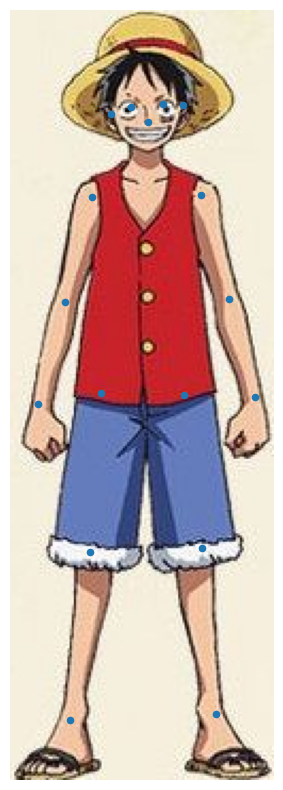

In [202]:
i = 30
plt.figure(figsize=(20,10))
plt.imshow(test_image)
plt.scatter(all_pose_pred_coords[0][0][0], all_pose_pred_coords[0][0][1], s=20)
plt.axis('off')
plt.show()


In [188]:
gray_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)


In [189]:
face_classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)

In [190]:
face = face_classifier.detectMultiScale(
    gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(40, 40)
)

In [198]:
face

()

(-0.5, 123.5, 361.5, -0.5)

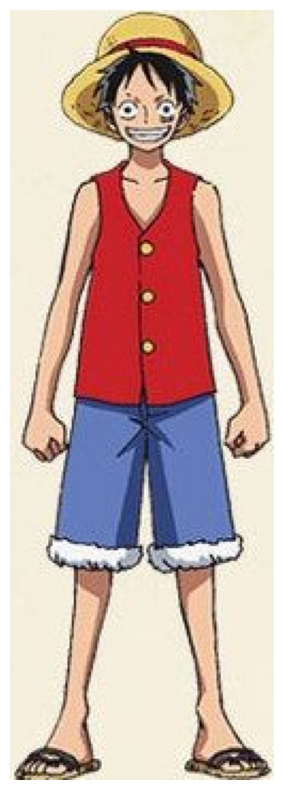

In [199]:
for (x, y, w, h) in face:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 4) 
    
#img_rgb = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20,10))
plt.imshow(test_image)
plt.axis('off')